<a href="https://colab.research.google.com/github/NithyaStanly/internship/blob/main/fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [ ]:
fish_data=pd.read_csv("/content/fish.csv",header=None,names=['species','weight','length1','length2','length3','height','width'])
fish_data.head()

,species,weight,length1,length2,length3,height,width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
fish_data['species'].value_counts()

,count
species,
Bream,34
Roach,20
Pike,17
Smelt,14


In [ ]:
new_data = fish_data.drop('species',axis=1)
new_data.head()

,weight,length1,length2,length3,height,width
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
new_data.describe()

,weight,length1,length2,length3,height,width
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(new_data)
new_data = pd.DataFrame(new_data,columns=fish_data.columns[1:])
new_data.head()

,weight,length1,length2,length3,height,width
0,-0.501097,-0.368786,-0.343234,-0.237815,1.003212,0.253740
1,-0.374343,-0.297502,-0.268935,-0.146348,1.158696,0.443765
2,-0.242308,-0.306413,-0.252424,-0.153970,1.139261,1.061347
3,-0.181572,-0.092563,-0.046036,0.028965,0.964342,0.206233
4,-0.004645,-0.074743,-0.046036,0.067076,0.828293,1.061347


In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,15):
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=12)
  kmeans.fit(new_data)
  wcss.append(kmeans.inertia_)

wcss

[509.9999999999999,
 287.00839893423193,
 156.18749056306456,
 98.61206407528321,
 52.551230090717056,
 39.027527292271984,
 32.32352247410468,
 27.52444293647819,
 23.63704735388194,
 20.598462944747038,
 18.637462599854604,
 16.805318288643313,
 15.717880540762406,
 14.198173864148716]

In [ ]:
kmeans.cluster_centers_
kmeans.labels_
kmeans.inertia_

14.198173864148716

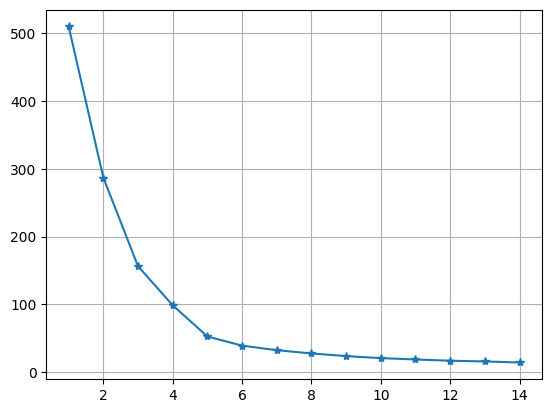

In [ ]:
plt.plot(range(1,15),wcss,marker="*")
plt.grid()

In [ ]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=12)
kmeans.fit(new_data)

KMeans(n_clusters=4, n_init=10, random_state=12)

In [ ]:
kmeans_labels = kmeans.predict(new_data)

In [ ]:
kmeans_labels

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
fish_data['kmeans_cluster'] = kmeans_labels
fish_data.head()

,species,weight,length1,length2,length3,height,width,kmeans_cluster
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4,3
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8,0
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1,0
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3,0
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1,0


In [ ]:
fish_data['species'].value_counts()

,count
species,
Bream,34
Roach,20
Pike,17
Smelt,14


In [ ]:
fish_data['kmeans_cluster'].value_counts()

,count
kmeans_cluster,
0,34
3,21
2,17
1,13


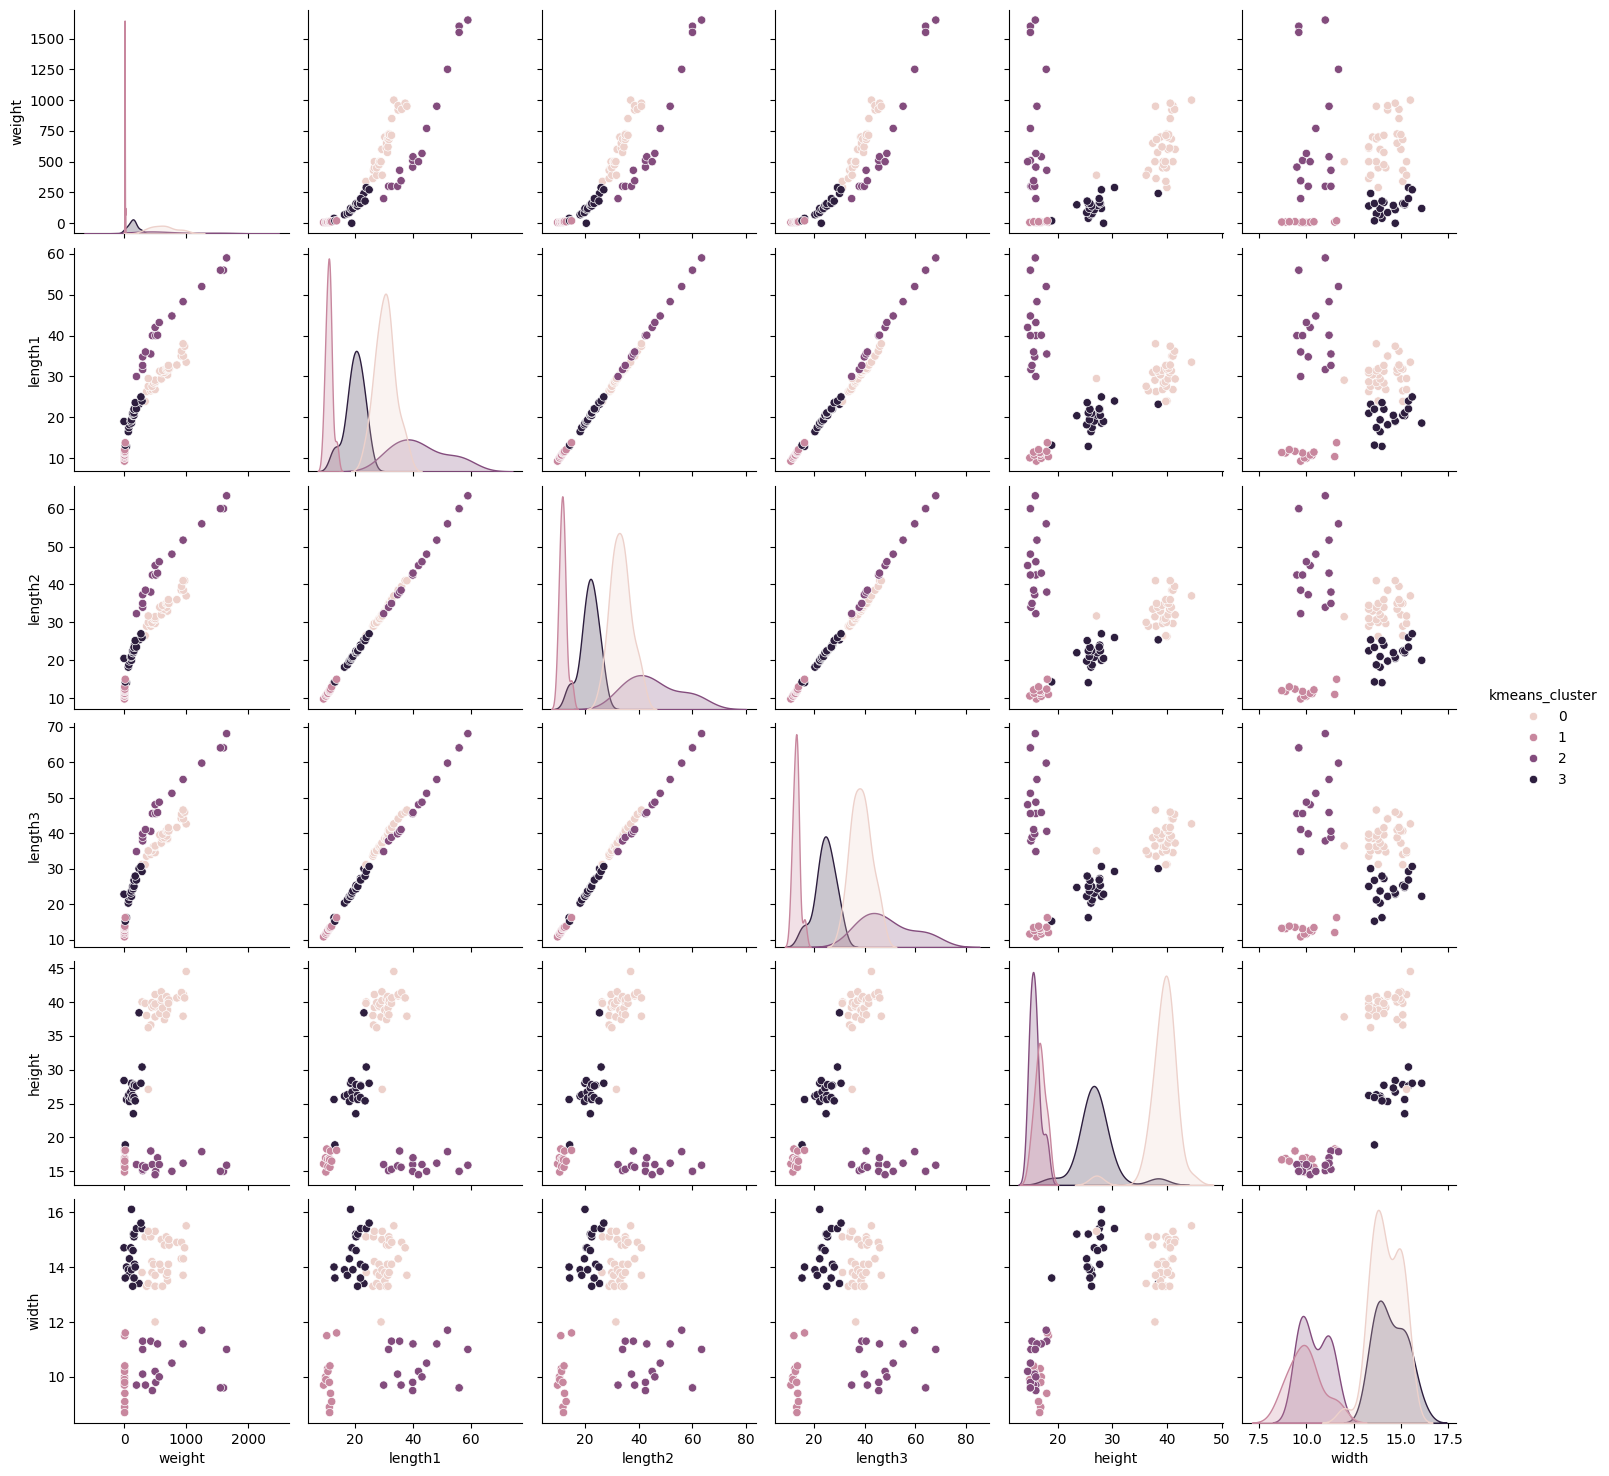

In [ ]:
sns.pairplot(fish_data,hue='kmeans_cluster')

<Axes: xlabel='height', ylabel='length2'>

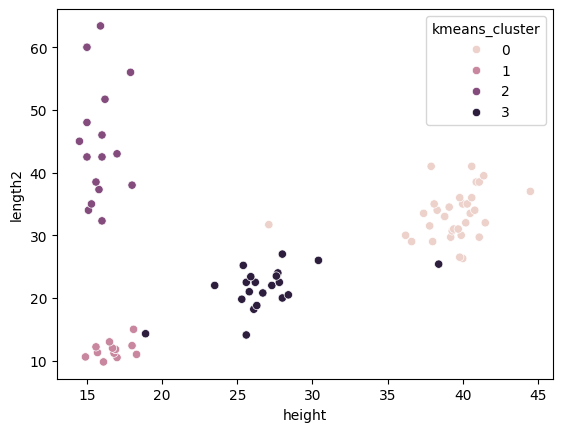

In [ ]:
sns.scatterplot(data=fish_data,x='height',y='length2',hue='kmeans_cluster')